In [2]:
from dataclasses import asdict
from pathlib import Path
import pickle

import fsspec
import matplotlib.pyplot as plt
import mlflow
import pandas as pd
import seaborn as sns

from nas import _REPO_ROOT
from nas.benchmark.nats_bench import ArchitectureResult

In [3]:
sns.set_theme()
sns.set_context("notebook")

In [4]:
TRACKING_URI = str(_REPO_ROOT / "results" / "mlruns")
TRACKING_URI

'/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/nas/results/mlruns'

In [5]:
EXPERIMENT_NAME = "sa_exponential_accuracy"
EXPERIMENT_NAME

'sa_exponential_accuracy'

In [6]:
client = mlflow.tracking.MlflowClient(tracking_uri=TRACKING_URI)
client

In [7]:
selected_experiment = client.search_experiments(
    filter_string=f"name = '{EXPERIMENT_NAME}'"
)[0]
selected_experiment

<Experiment: artifact_location='file:///home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/nas/results/mlruns/389904625793289061', creation_time=1722940503400, experiment_id='389904625793289061', last_update_time=1722940503400, lifecycle_stage='active', name='sa_exponential_accuracy', tags={}>

In [8]:
selected_runs = client.search_runs(selected_experiment.experiment_id)
len(selected_runs)

40

In [9]:
run_df = pd.json_normalize([dict(selected_run.data) for selected_run in selected_runs])
run_df

,metrics.final_val_time_per_epoch,metrics.final_test_loss,metrics.accuracy,metrics.final_test_accuracy,metrics.time,metrics.control_parameter,metrics.final_val_loss,metrics.loss,metrics.final_val_time,metrics.final_test_time,...,params.benchmark__path,params.optimiser__number_iterations,params.seed,params.optimiser__cooling_schedule__type,params.results_dir,tags.mlflow.source.git.commit,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.runName
0,3.194443,0.497300,83.742,83.715,38.333315,1.056589e-29,0.493861,0.493861,38.333315,15.333326,...,models/NATS-tss-v1_0-3ffb9-simple,300,9,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,eb07e6efeecbf30bc144b2b19669568c473a63c8,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,skillful-worm-802
1,4.232468,0.498287,84.042,83.480,50.789620,1.056589e-29,0.478574,0.478574,50.789620,20.315848,...,models/NATS-tss-v1_0-3ffb9-simple,300,8,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,eb07e6efeecbf30bc144b2b19669568c473a63c8,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,intrigued-fawn-124
2,3.760726,0.502142,83.964,83.425,45.128714,1.056589e-29,0.484066,0.484066,45.128714,18.051486,...,models/NATS-tss-v1_0-3ffb9-simple,300,7,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,eb07e6efeecbf30bc144b2b19669568c473a63c8,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,sassy-ray-741
3,4.394941,0.470389,84.892,84.820,52.739287,1.056589e-29,0.458039,0.458039,52.739287,21.095715,...,models/NATS-tss-v1_0-3ffb9-simple,300,6,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,eb07e6efeecbf30bc144b2b19669568c473a63c8,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,resilient-gnat-743
4,4.394941,0.470389,84.892,84.820,52.739287,1.056589e-29,0.458039,0.458039,52.739287,21.095715,...,models/NATS-tss-v1_0-3ffb9-simple,300,5,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,eb07e6efeecbf30bc144b2b19669568c473a63c8,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,nervous-grub-8
5,4.394941,0.470389,84.892,84.820,52.739287,1.056589e-29,0.458039,0.458039,52.739287,21.095715,...,models/NATS-tss-v1_0-3ffb9-simple,300,4,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,eb07e6efeecbf30bc144b2b19669568c473a63c8,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,vaunted-asp-681
6,4.394941,0.470389,84.892,84.820,52.739287,1.056589e-29,0.458039,0.458039,52.739287,21.095715,...,models/NATS-tss-v1_0-3ffb9-simple,300,3,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,eb07e6efeecbf30bc144b2b19669568c473a63c8,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,industrious-vole-379
7,4.394941,0.470389,84.892,84.820,52.739287,1.056589e-29,0.458039,0.458039,52.739287,21.095715,...,models/NATS-tss-v1_0-3ffb9-simple,300,2,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,eb07e6efeecbf30bc144b2b19669568c473a63c8,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,defiant-shrew-493
8,4.394941,0.470389,84.892,84.820,52.739287,1.056589e-29,0.458039,0.458039,52.739287,21.095715,...,models/NATS-tss-v1_0-3ffb9-simple,300,1,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,eb07e6efeecbf30bc144b2b19669568c473a63c8,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,upset-skunk-942
9,4.394941,0.470389,84.892,84.820,52.739287,1.056589e-29,0.458039,0.458039,52.739287,21.095715,...,models/NATS-tss-v1_0-3ffb9-simple,300,0,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,eb07e6efeecbf30bc144b2b19669568c473a63c8,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,mysterious-finch-842


In [10]:
run_df.columns

Index(['metrics.final_val_time_per_epoch', 'metrics.final_test_loss',
       'metrics.accuracy', 'metrics.final_test_accuracy', 'metrics.time',
       'metrics.control_parameter', 'metrics.final_val_loss', 'metrics.loss',
       'metrics.final_val_time', 'metrics.final_test_time',
       'metrics.final_val_accuracy', 'metrics.transition',
       'metrics.time_per_epoch', 'metrics.final_test_time_per_epoch',
       'params.optimiser__cooling_schedule__decay_rate',
       'params.benchmark__edges_per_cell',
       'params.optimiser__cooling_schedule__length', 'params.results_base_dir',
       'params.benchmark__name', 'params.benchmark__dataset',
       'params.optimiser__algorithm',
       'params.optimiser__cooling_schedule__initial', 'params.experiment_name',
       'params.benchmark__path', 'params.optimiser__number_iterations',
       'params.seed', 'params.optimiser__cooling_schedule__type',
       'params.results_dir', 'tags.mlflow.source.git.commit',
       'tags.mlflow.user', 't

In [11]:
selected_runs[0].info.artifact_uri

'file:///home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/nas/results/mlruns/389904625793289061/eec5560fc591427689bb5bdcf2e047cf/artifacts'

In [12]:
mlflow.artifacts.list_artifacts(
    selected_runs[0].info.artifact_uri, tracking_uri=TRACKING_URI
)

[<FileInfo: file_size=654, is_dir=False, path='artifacts/result.pkl'>]

In [13]:
run_results: list[ArchitectureResult] = []
for run in selected_runs:
    artifact_uri: str = run.info.artifact_uri
    with fsspec.open(Path(artifact_uri) / "result.pkl", "rb") as f:
        run_results.append(pickle.load(f))
run_results

[ArchitectureResult(index=12451, train=Metrics(loss=0.35361560778617857, accuracy=87.8699999963379, time_per_epoch=8.796414832274118, time=105.55697798728943), val=Metrics(loss=0.4938606442213058, accuracy=83.74200000854492, time_per_epoch=3.194442930675688, time=38.33331516810826), test=Metrics(loss=0.49730029714107515, accuracy=83.715, time_per_epoch=1.2777771722702753, time=15.333326067243304), flops=78.56193, size_parameters=0.559386, latency=0.01564202496879979),
 ArchitectureResult(index=4141, train=Metrics(loss=0.3521453081130982, accuracy=87.92199999633789, time_per_epoch=12.39090770483017, time=148.69089245796204), val=Metrics(loss=0.4785738532447815, accuracy=84.04200000366211, time_per_epoch=4.232468292826698, time=50.78961951392037), test=Metrics(loss=0.4982874787807464, accuracy=83.47999999999999, time_per_epoch=1.6929873171306793, time=20.31584780556815), flops=149.34081, size_parameters=1.045466, latency=0.018354142967023347),
 ArchitectureResult(index=13325, train=Metri

In [14]:
result_df = pd.json_normalize(asdict(result) for result in run_results)
result_df

,index,flops,size_parameters,latency,train.loss,train.accuracy,train.time_per_epoch,train.time,val.loss,val.accuracy,...,test.loss,test.accuracy,test.time_per_epoch,test.time,architecture.edge_0_to_1,architecture.edge_0_to_2,architecture.edge_1_to_2,architecture.edge_0_to_3,architecture.edge_1_to_3,architecture.edge_2_to_3
0,12451,78.56193,0.559386,0.015642,0.353616,87.870,8.796415,105.556978,0.493861,83.742,...,0.497300,83.715,1.277777,15.333326,3,0,4,1,3,0
1,4141,149.34081,1.045466,0.018354,0.352145,87.922,12.390908,148.690892,0.478574,84.042,...,0.498287,83.480,1.692987,20.315848,3,1,3,3,3,1
2,13325,117.88353,0.830426,0.020455,0.344022,88.324,11.526478,138.317736,0.484066,83.964,...,0.502142,83.425,1.504290,18.051486,1,3,3,2,1,3
3,13714,153.27297,1.073466,0.020343,0.302177,89.766,14.030071,168.360855,0.458039,84.892,...,0.470389,84.820,1.757976,21.095715,3,3,3,1,2,3
4,13714,153.27297,1.073466,0.020343,0.302177,89.766,14.030071,168.360855,0.458039,84.892,...,0.470389,84.820,1.757976,21.095715,3,3,3,1,2,3
5,13714,153.27297,1.073466,0.020343,0.302177,89.766,14.030071,168.360855,0.458039,84.892,...,0.470389,84.820,1.757976,21.095715,3,3,3,1,2,3
6,13714,153.27297,1.073466,0.020343,0.302177,89.766,14.030071,168.360855,0.458039,84.892,...,0.470389,84.820,1.757976,21.095715,3,3,3,1,2,3
7,13714,153.27297,1.073466,0.020343,0.302177,89.766,14.030071,168.360855,0.458039,84.892,...,0.470389,84.820,1.757976,21.095715,3,3,3,1,2,3
8,13714,153.27297,1.073466,0.020343,0.302177,89.766,14.030071,168.360855,0.458039,84.892,...,0.470389,84.820,1.757976,21.095715,3,3,3,1,2,3
9,13714,153.27297,1.073466,0.020343,0.302177,89.766,14.030071,168.360855,0.458039,84.892,...,0.470389,84.820,1.757976,21.095715,3,3,3,1,2,3


In [15]:
result_df.columns

Index(['index', 'flops', 'size_parameters', 'latency', 'train.loss',
       'train.accuracy', 'train.time_per_epoch', 'train.time', 'val.loss',
       'val.accuracy', 'val.time_per_epoch', 'val.time', 'test.loss',
       'test.accuracy', 'test.time_per_epoch', 'test.time',
       'architecture.edge_0_to_1', 'architecture.edge_0_to_2',
       'architecture.edge_1_to_2', 'architecture.edge_0_to_3',
       'architecture.edge_1_to_3', 'architecture.edge_2_to_3'],
      dtype='object')

In [16]:
result_df.describe()

,index,flops,size_parameters,latency,train.loss,train.accuracy,train.time_per_epoch,train.time,val.loss,val.accuracy,...,test.loss,test.accuracy,test.time_per_epoch,test.time,architecture.edge_0_to_1,architecture.edge_0_to_2,architecture.edge_1_to_2,architecture.edge_0_to_3,architecture.edge_1_to_3,architecture.edge_2_to_3
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,...,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,12567.900000,143.639178,1.007106,0.019612,0.313672,89.344100,13.238870,158.866438,0.464527,84.66355,...,0.477134,84.51750,1.694561,20.334729,2.875000,2.675000,2.950000,1.225000,2.225000,2.550000
std,2911.386204,23.304689,0.160307,0.001604,0.020994,0.770692,1.614496,19.373948,0.012277,0.42359,...,0.011932,0.53608,0.143119,1.717424,0.563301,0.888314,0.638508,0.619657,0.530481,0.959434
min,4141.000000,78.561930,0.559386,0.014724,0.302177,87.870000,8.398250,100.779005,0.458039,83.74200,...,0.470389,83.42500,1.277777,15.333326,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,13714.000000,152.289930,1.066466,0.020343,0.302177,89.647500,13.620280,163.443364,0.458039,84.83950,...,0.470389,84.58875,1.741729,20.900748,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000
50%,13714.000000,153.272970,1.073466,0.020343,0.302177,89.766000,14.030071,168.360855,0.458039,84.89200,...,0.470389,84.82000,1.757976,21.095715,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000
75%,13714.000000,153.272970,1.073466,0.020343,0.305257,89.766000,14.030071,168.360855,0.460052,84.89200,...,0.475090,84.82000,1.757976,21.095715,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000
max,14174.000000,153.272970,1.073466,0.020455,0.353616,89.766000,14.030071,168.360855,0.493861,84.89200,...,0.502142,84.82000,1.757976,21.095715,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000


<Axes: xlabel='index', ylabel='Count'>

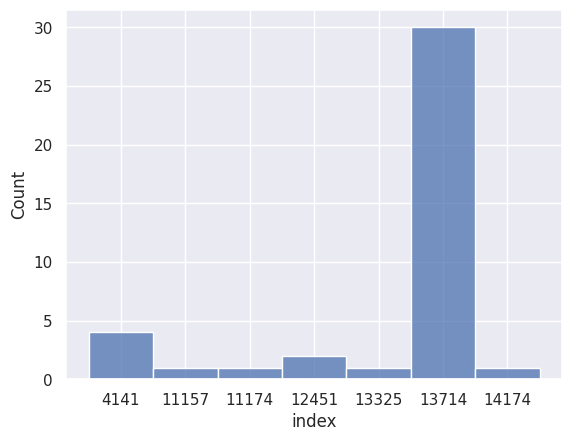

In [17]:
sns.histplot(result_df["index"].sort_values().astype("str"))

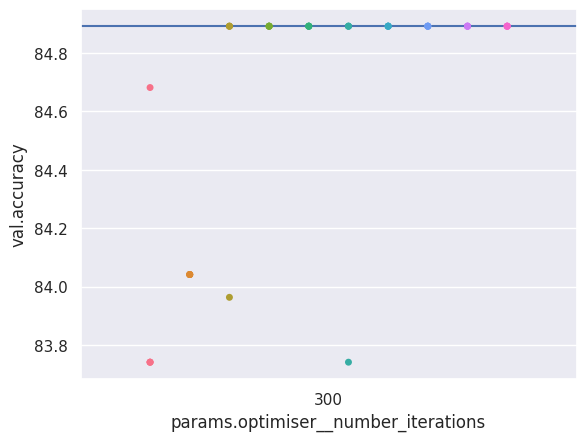

In [18]:
ax = plt.subplot()
sns.stripplot(
    result_df.join(run_df),
    x="params.optimiser__number_iterations",
    y="val.accuracy",
    hue="params.seed",
    palette="husl",
    dodge=True,
    jitter=False,
    legend=False,
    ax=ax,
)
ax.axhline(84.89199999023438)

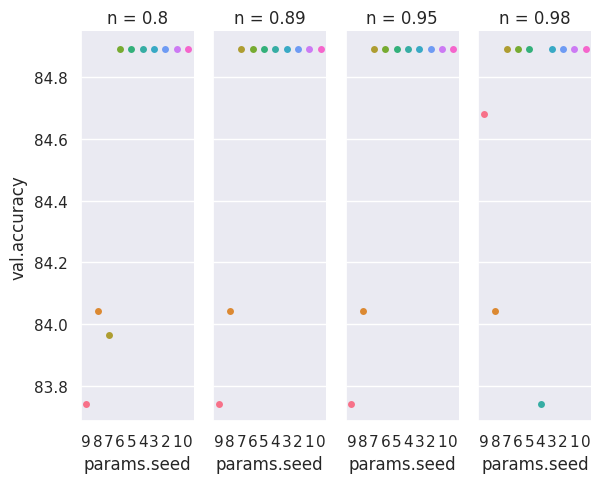

In [19]:
sns.catplot(
    result_df.join(run_df).rename(
        columns={"params.optimiser__cooling_schedule__decay_rate": "n"}
    ),
    x="params.seed",
    y="val.accuracy",
    col="n",
    col_wrap=5,
    hue="params.seed",
    palette="husl",
    aspect=0.3,
    legend=False,
)

In [20]:
result_df["optimal_cifar10"] = result_df["index"] == 13714
result_df["optimal_cifar10"].mean()

0.75

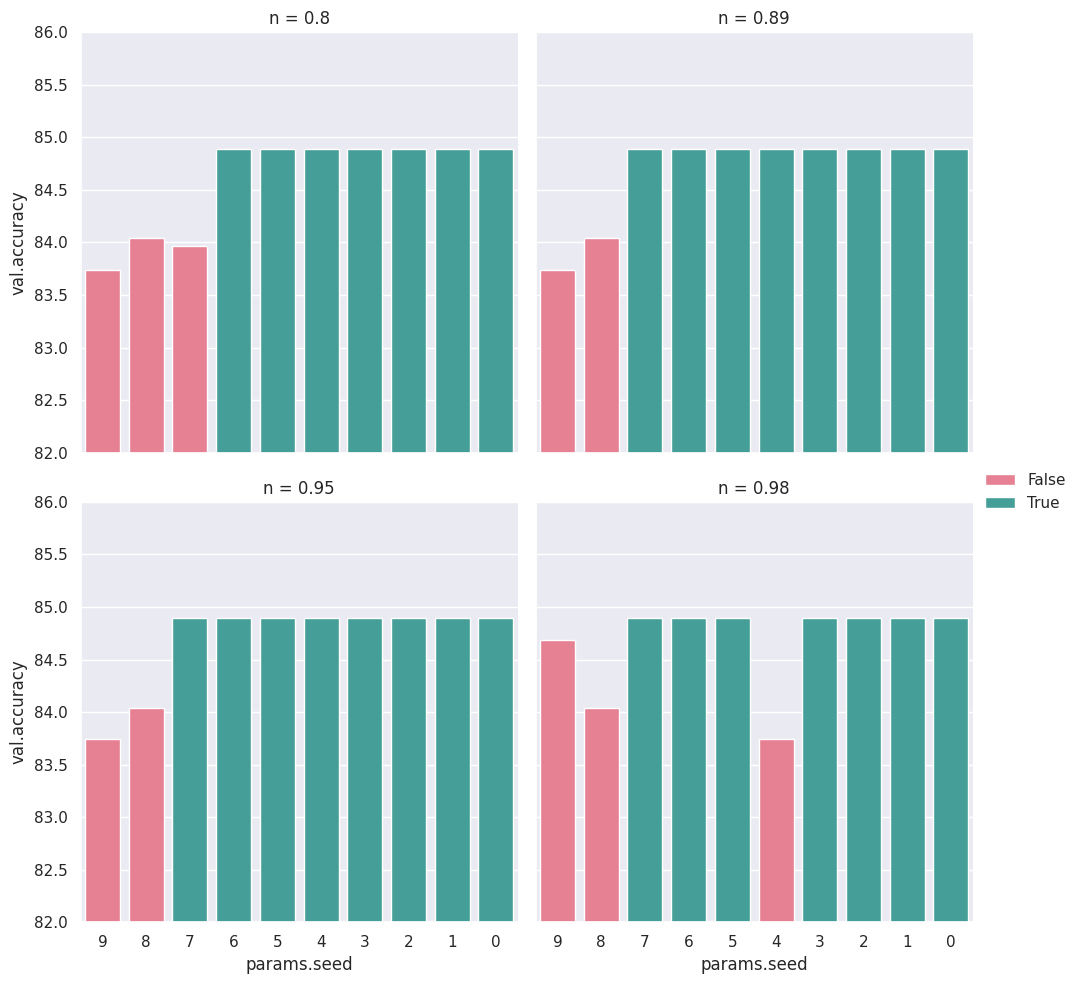

In [21]:
g = sns.FacetGrid(
    result_df.join(run_df).rename(
        columns={"params.optimiser__cooling_schedule__decay_rate": "n"}
    ),
    col="n",
    col_wrap=2,
    ylim=(82, 86),
    height=5,
)
g.map_dataframe(
    sns.barplot,
    x="params.seed",
    y="val.accuracy",
    hue="optimal_cifar10",
    palette="husl",
)
g.add_legend()